In [1]:
import os
import cv2
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img = image.load_img("Data/Train/miko/20220101_084933.jpg")

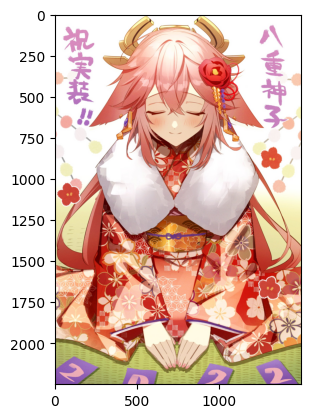

In [3]:
plt.imshow(img)

In [4]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [5]:
train_dataset = train.flow_from_directory('Data/Train/',
                                         target_size=(300,300),
                                         batch_size=27,
                                         class_mode='binary')

val_dataset = train.flow_from_directory('Data/Val/',
                                         target_size=(300,300),
                                    
                                         batch_size=27,
                                         class_mode='binary')

Found 755 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'dont': 0, 'miko': 1}

In [7]:
val_dataset.class_indices

{'dont': 0, 'miko': 1}

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(300,300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
28/28 [==============================] - 96s 3s/step - loss: 1.3475 - accuracy: 0.5801 - val_loss: 0.6692 - val_accuracy: 0.6087
Epoch 2/30
28/28 [==============================] - 93s 3s/step - loss: 0.6783 - accuracy: 0.6079 - val_loss: 0.6349 - val_accuracy: 0.5217
Epoch 3/30
28/28 [==============================] - 94s 3s/step - loss: 0.5891 - accuracy: 0.6728 - val_loss: 0.4599 - val_accuracy: 0.7826
Epoch 4/30
28/28 [==============================] - 94s 3s/step - loss: 0.4477 - accuracy: 0.7894 - val_loss: 0.4819 - val_accuracy: 0.7826
Epoch 5/30
28/28 [==============================] - 94s 3s/step - loss: 0.3636 - accuracy: 0.8530 - val_loss: 0.4745 - val_accuracy: 0.7826
Epoch 6/30
28/28 [==============================] - 94s 3s/step - loss: 0.2280 - accuracy: 0.9099 - val_loss: 0.3972 - val_accuracy: 0.8696
Epoch 7/30
28/28 [==============================] - 94s 3s/step - loss: 0.1413 - accuracy: 0.9391 - val_loss: 0.6093 - val_accuracy: 0.7391
Epoch 8/30
28/28 [==

In [11]:
test_dataset = train.flow_from_directory('Data/Test/',
                                         target_size=(300,300),
                                    
                                         batch_size=27,
                                         class_mode='binary')

Found 68 images belonging to 2 classes.


In [12]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

3/3 [==============================] - 5s 2s/step - loss: 3.3930 - accuracy: 0.7941
Test accuracy: 0.7941176295280457


In [13]:
img = image.load_img('Data\illust_93211082_20211007_102809.png',target_size=(300,300))
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
val = model.predict(X)

1/1 [==============================] - 0s 125ms/step


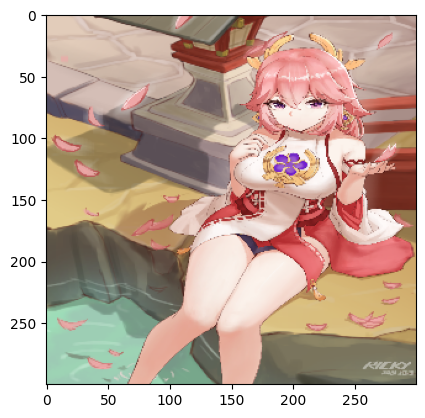

In [14]:
plt.imshow(img)

In [15]:
print(val)

[[1.]]


In [16]:
model.save('ccn_miko_model.h5')

In [ ]:
source_folder = r"D:\pixiv\\"
destination_folder = r"D:\Predicted_Miko\\"
i=0
for images in os.listdir(source_folder):
    # construct full file path
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        source = source_folder + images
        destination = destination_folder + images
        print(images)
        img = image.load_img(source,target_size=(400,400))
        print("loaded")
        i=i+1
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        val = model.predict(X)
        if val == 1 :
            shutil.copy(source, destination)
            print('copied', images)
            os.remove(source)
            print('deleted')

In [18]:
source_folder = r"D:\Predicted_Miko\\"
destination_folder = r"D:\pixiv\\"
for images in os.listdir(source_folder):
    # construct full file path
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        source = source_folder + images
        destination = destination_folder + images
        print(images)
        img = image.load_img(source,target_size=(300,300))
        print("loaded")
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        val = model.predict(X)
        if val == 0 :
            shutil.copy(source, destination)
            print('copied', images)
            os.remove(source)
            print('deleted')

20220124_111933.jpg
loaded
1/1 [==============================] - 0s 47ms/step
copied 20220124_111933.jpg
deleted
illust_100029120_20221004_082818.jpg
loaded
1/1 [==============================] - 0s 52ms/step
illust_100042750_20221018_081850.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_100042750_20221018_081850.png
deleted
illust_100069731_20221019_122120.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_100069731_20221019_122120.jpg
deleted
illust_100082011_20221110_192137.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_100100371_20220818_081944.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_100103190_20221111_010023.jpg
loaded
1/1 [==============================] - 0s 33ms/step
copied illust_100103190_20221111_010023.jpg
deleted
illust_100109367_20221110_080446.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_100114654_20220926_214954.jpg
loaded
1/1 [=========

1/1 [==============================] - 0s 43ms/step
copied illust_100795236_20220827_191453.png
deleted
illust_100804680_20220830_092257.jpg
loaded
1/1 [==============================] - 0s 48ms/step
illust_100835363_20220830_092654.png
loaded
1/1 [==============================] - 0s 44ms/step
copied illust_100835363_20220830_092654.png
deleted
illust_100858259_20221101_123106.png
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_100858259_20221101_123106.png
deleted
illust_100862060_20221204_155914.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_100862060_20221204_155914.jpg
deleted
illust_100870710_20221203_195050.png
loaded
1/1 [==============================] - 0s 42ms/step
illust_100870710_20221203_195052.png
loaded
1/1 [==============================] - 0s 56ms/step
illust_100870710_20221203_195055.png
loaded
1/1 [==============================] - 0s 47ms/step
illust_100879217_20220906_115903.png
loaded
1/1 [===================

1/1 [==============================] - 0s 47ms/step
copied illust_101612340_20221001_202206.jpg
deleted
illust_101646294_20221010_142230.jpg
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_101646294_20221010_142230.jpg
deleted
illust_101647162_20221009_151948.png
loaded
1/1 [==============================] - 0s 45ms/step
copied illust_101647162_20221009_151948.png
deleted
illust_101662357_20221019_121838.png
loaded
1/1 [==============================] - 0s 46ms/step
illust_101675204_20221022_143732.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_101675204_20221022_143732.png
deleted
illust_101704369_20221006_083408.png


C:\Users\harsh.LAPTOP-V35KOQV8\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loaded
1/1 [==============================] - 0s 43ms/step
copied illust_101704369_20221006_083408.png
deleted
illust_101716069_20221012_205729.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_101727424_20221019_121443.jpg
loaded
1/1 [==============================] - 0s 32ms/step
illust_101731715_20221007_144054.png
loaded
1/1 [==============================] - 0s 47ms/step
illust_101733296_20221007_063448.png
loaded
1/1 [==============================] - 0s 34ms/step
illust_101766546_20221025_213108.png
loaded
1/1 [==============================] - 0s 42ms/step
copied illust_101766546_20221025_213108.png
deleted
illust_101780700_20221220_093149.jpg
loaded
1/1 [==============================] - 0s 49ms/step
copied illust_101780700_20221220_093149.jpg
deleted
illust_101809388_20221025_081316.jpg
loaded
1/1 [==============================] - 0s 42ms/step
illust_101819694_20221010_131926.jpg
loaded
1/1 [==============================] - 0s 43ms/step
copied illust_101

1/1 [==============================] - 0s 37ms/step
copied illust_102317860_20221101_123911.jpg
deleted
illust_102334792_20221125_001608.jpg
loaded
1/1 [==============================] - 0s 48ms/step
illust_102334792_20221125_001610.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_102359349_20221110_080413.jpg
loaded
1/1 [==============================] - 0s 48ms/step
copied illust_102359349_20221110_080413.jpg
deleted
illust_102376480_20221108_091857.png
loaded
1/1 [==============================] - 0s 47ms/step
illust_102376480_20221108_091901.png
loaded
1/1 [==============================] - 0s 46ms/step
illust_102376480_20221108_091904.png
loaded
1/1 [==============================] - 0s 31ms/step
illust_102376480_20221108_091907.png
loaded
1/1 [==============================] - 0s 33ms/step
illust_102376480_20221108_091910.png
loaded
1/1 [==============================] - 0s 41ms/step
illust_102376480_20221108_091916.png
loaded
1/1 [===========================

copied illust_102773124_20221116_222845.png
deleted
illust_102781853_20221122_202956.png
loaded
1/1 [==============================] - 0s 46ms/step
illust_102812317_20221115_164246.jpg
loaded
1/1 [==============================] - 0s 51ms/step
copied illust_102812317_20221115_164246.jpg
deleted
illust_102831795_20221122_202854.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_102831795_20221122_202854.png
deleted
illust_102831848_20221122_202700.png
loaded
1/1 [==============================] - 0s 42ms/step
illust_102843183_20221116_221352.jpg
loaded
1/1 [==============================] - 0s 49ms/step
illust_102843183_20221116_221401.jpg
loaded
1/1 [==============================] - 0s 48ms/step
copied illust_102843183_20221116_221401.jpg
deleted
illust_102857851_20221216_002256.png
loaded
1/1 [==============================] - 0s 46ms/step
copied illust_102857851_20221216_002256.png
deleted
illust_102867354_20221125_001809.jpg
loaded
1/1 [===================

1/1 [==============================] - 0s 31ms/step
copied illust_81536040_20211222_210745.png
deleted
illust_81973235_20211209_144527.jpg
loaded
1/1 [==============================] - 0s 52ms/step
copied illust_81973235_20211209_144527.jpg
deleted
illust_82298043_20211103_180810.jpg
loaded
1/1 [==============================] - 0s 33ms/step
copied illust_82298043_20211103_180810.jpg
deleted
illust_82326314_20211026_194449.png
loaded
1/1 [==============================] - 0s 42ms/step
copied illust_82326314_20211026_194449.png
deleted
illust_82375104_20220923_183207.jpg
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_82375104_20220923_183207.jpg
deleted
illust_82672926_20210731_142339.jpg
loaded
1/1 [==============================] - 0s 35ms/step
copied illust_82672926_20210731_142339.jpg
deleted
illust_82867352_20211123_160647.jpg
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_82867352_20211123_160647.jpg
deleted
illust_82966343_20221

loaded
1/1 [==============================] - 0s 42ms/step
illust_87953603_20211103_180639.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_87953603_20211103_180639.jpg
deleted
illust_87953603_20211103_180654.jpg
loaded
1/1 [==============================] - 0s 33ms/step
copied illust_87953603_20211103_180654.jpg
deleted
illust_87957475_20220925_201446.png
loaded
1/1 [==============================] - 0s 51ms/step
copied illust_87957475_20220925_201446.png
deleted
illust_88049646_20210804_084025.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_88049646_20210804_084025.jpg
deleted
illust_88070709_20210731_102120.png
loaded
1/1 [==============================] - 0s 33ms/step
copied illust_88070709_20210731_102120.png
deleted
illust_88096375_20211023_081917.jpg
loaded
1/1 [==============================] - 0s 40ms/step
copied illust_88096375_20211023_081917.jpg
deleted
illust_88334293_20211123_101639.jpg
loaded
1/1 [=================

1/1 [==============================] - 0s 35ms/step
copied illust_91791692_20211102_092737.png
deleted
illust_91890800_20210826_095605.png
loaded
1/1 [==============================] - 0s 47ms/step
illust_91900786_20221108_092438.png
loaded
1/1 [==============================] - 0s 55ms/step
copied illust_91900786_20221108_092438.png
deleted
illust_91900786_20221108_092439.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_91900786_20221108_092439.png
deleted
illust_91973745_20211105_082155.jpg
loaded
1/1 [==============================] - 0s 42ms/step
copied illust_91973745_20211105_082155.jpg
deleted
illust_91988144_20211026_194838.jpg
loaded
1/1 [==============================] - 0s 29ms/step
copied illust_91988144_20211026_194838.jpg
deleted
illust_92049511_20220422_235444.png
loaded
1/1 [==============================] - 0s 35ms/step
illust_92058626_20220915_052850.jpg
loaded
1/1 [==============================] - 0s 33ms/step
copied illust_92058626_20220

loaded
1/1 [==============================] - 0s 31ms/step
illust_93113003_20211001_083215.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_93116780_20211105_082917.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_93195555_20211109_074019.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_93197348_20211111_154236.jpg
loaded
1/1 [==============================] - 0s 40ms/step
copied illust_93197348_20211111_154236.jpg
deleted
illust_93199923_20221023_181630.jpg
loaded
1/1 [==============================] - 0s 42ms/step
copied illust_93199923_20221023_181630.jpg
deleted
illust_93208004_20211006_085804.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_93211082_20211007_102809.png
loaded
1/1 [==============================] - 0s 47ms/step
illust_93211561_20211103_175448.png
loaded
1/1 [==============================] - 0s 53ms/step
illust_93215165_20211026_195022.png
loaded
1/1 [==============================]

1/1 [==============================] - 0s 40ms/step
illust_94417181_20211205_040102.jpg
loaded
1/1 [==============================] - 0s 54ms/step
copied illust_94417181_20211205_040102.jpg
deleted
illust_94418264_20221108_092311.png
loaded
1/1 [==============================] - 0s 39ms/step
copied illust_94418264_20221108_092311.png
deleted
illust_94452093_20221025_124737.jpg
loaded
1/1 [==============================] - 0s 39ms/step
copied illust_94452093_20221025_124737.jpg
deleted
illust_94555877_20220402_112811.jpg
loaded
1/1 [==============================] - 0s 43ms/step
illust_94573171_20220402_113639.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_94782316_20221020_201426.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_94797295_20221019_120919.jpg
loaded
1/1 [==============================] - 0s 50ms/step
copied illust_94797295_20221019_120919.jpg
deleted
illust_94845942_20220225_215811.jpg
loaded
1/1 [==============================]

1/1 [==============================] - 0s 45ms/step
illust_96264387_20221123_193609.png
loaded
1/1 [==============================] - 0s 32ms/step
illust_96266874_20220818_021532.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_96266874_20220818_021532.png
deleted
illust_96270978_20221019_133700.jpg
loaded
1/1 [==============================] - 0s 41ms/step
illust_96273951_20221022_143918.jpg
loaded
1/1 [==============================] - 0s 37ms/step
illust_96276352_20221019_121430.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_96279432_20221019_122530.png
loaded
1/1 [==============================] - 0s 33ms/step
illust_96283294_20221019_134002.jpg
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_96283294_20221019_134002.jpg
deleted
illust_96283480_20221019_121150.jpg
loaded
1/1 [==============================] - 0s 40ms/step
illust_96284872_20220217_160409.jpg
loaded
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 48ms/step
illust_96575087_20221019_133956.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_96579964_20220402_113532.jpg
loaded
1/1 [==============================] - 0s 27ms/step
illust_96581335_20221019_133745.jpg
loaded
1/1 [==============================] - 0s 38ms/step
illust_96581762_20220402_113616.jpg
loaded
1/1 [==============================] - 0s 40ms/step
illust_96617115_20221022_143250.png
loaded
1/1 [==============================] - 0s 51ms/step
illust_96630465_20220402_112425.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_96630528_20221027_121704.png
loaded
1/1 [==============================] - 0s 32ms/step
illust_96637242_20221012_141656.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_96637242_20221012_141656.jpg
deleted
illust_96639999_20220906_121013.jpg
loaded
1/1 [==============================] - 0s 35ms/step
illust_96650593_20221022_143437.png
loaded

1/1 [==============================] - 0s 42ms/step
copied illust_97388712_20221216_062024.jpg
deleted
illust_97389621_20221019_131552.jpg
loaded
1/1 [==============================] - 0s 50ms/step
copied illust_97389621_20221019_131552.jpg
deleted
illust_97402467_20220714_155738.jpg
loaded
1/1 [==============================] - 0s 31ms/step
illust_97416391_20221025_095606.jpg
loaded
1/1 [==============================] - 0s 32ms/step
illust_97419529_20220711_064714.jpg
loaded
1/1 [==============================] - 0s 47ms/step
illust_97433946_20220621_092315.jpg
loaded
1/1 [==============================] - 0s 39ms/step
copied illust_97433946_20220621_092315.jpg
deleted
illust_97456734_20221019_122810.jpg
loaded
1/1 [==============================] - 0s 36ms/step
illust_97481645_20221216_110450.png
loaded
1/1 [==============================] - 0s 35ms/step
illust_97484712_20221019_123041.jpg
loaded
1/1 [==============================] - 0s 39ms/step
illust_97488693_20221021_121728.png

1/1 [==============================] - 0s 50ms/step
copied illust_98412505_20221019_122141.jpg
deleted
illust_98419500_20220927_084523.png
loaded
1/1 [==============================] - 0s 52ms/step
illust_98428175_20220522_194746.jpg
loaded
1/1 [==============================] - 0s 42ms/step
illust_98439429_20220519_112704.jpg
loaded
1/1 [==============================] - 0s 35ms/step
illust_98461062_20220522_194152.jpg
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_98461062_20220522_194152.jpg
deleted
illust_98461400_20220929_015007.jpg
loaded
1/1 [==============================] - 0s 32ms/step
illust_98477899_20220925_234852.png
loaded
1/1 [==============================] - 0s 29ms/step
copied illust_98477899_20220925_234852.png
deleted
illust_98493970_20221210_012450.jpg
loaded
1/1 [==============================] - 0s 48ms/step
illust_98530935_20220522_194037.png
loaded
1/1 [==============================] - 0s 40ms/step
illust_98535507_20220711_064932.jpg

1/1 [==============================] - 0s 47ms/step
copied illust_99413989_20221001_174513.jpg
deleted
illust_99428027_20221004_082545.jpg
loaded
1/1 [==============================] - 0s 39ms/step
copied illust_99428027_20221004_082545.jpg
deleted
illust_99435210_20220925_182136.png
loaded
1/1 [==============================] - 0s 31ms/step
copied illust_99435210_20220925_182136.png
deleted
illust_99449394_20221019_131709.jpg
loaded
1/1 [==============================] - 0s 53ms/step
illust_99451084_20221128_102851.png
loaded
1/1 [==============================] - 0s 31ms/step
illust_99452061_20221006_083556.png
loaded
1/1 [==============================] - 0s 33ms/step
illust_99466638_20220712_094309.jpg
loaded
1/1 [==============================] - 0s 27ms/step
copied illust_99466638_20220712_094309.jpg
deleted
illust_99477376_20220712_094001.png
loaded
1/1 [==============================] - 0s 47ms/step
copied illust_99477376_20220712_094001.png
deleted
illust_99488024_20220712_093

In [ ]:
print(len(os.listdir(source_folder)))

In [ ]:
print(i)

In [ ]:
plt.imshow(img)